# Compare Cumulative Basin

Compare the cumulative results by impacted HRU and Reach

HRU #1 and #2 are impacted. These runoff to Reach #1 which is routed to Reach #2 - Reach #3 - Reach #4 - Reach #5.

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
#IN_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\NumModel\HSPF\Bas' \
#          r'in_10P_10K\Processed'
SIM_ROOT = "Cum_H%d_%s_DCmHBas_HRUs_"
XLSX_ROOT = "%s_ProcessMonthly_Stats.xlsx"

In [4]:
HRUs = [ "HR1", "HR2" ]
RRs = [ "RR1", "RR2", "RR3", "RR4", "RR5" ]

In [5]:
OUT_DIR = IN_DIR
#OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\NumModel\HSPF\Bas' \
#          r'in_10P_10K\Processed\Outputs'

In [6]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [7]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [8]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [9]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [10]:
RdHds = deepcopy( StatsHdsList )
RdHds.insert( 0, "Date" )

## Load Results

### HRU 1

In [11]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, HRUs[0] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, HRUs[0] ) ) ) )
HR1_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_2_RE = pd.read_excel( H0Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_3_RE = pd.read_excel( H0Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H0_4_RE = pd.read_excel( H0Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_2_RE = pd.read_excel( H1Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_3_RE = pd.read_excel( H1Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_H1_4_RE = pd.read_excel( H1Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

### HRU 2

In [12]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, HRUs[1] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, HRUs[1] ) ) ) )
HR2_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_2_RE = pd.read_excel( H0Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_3_RE = pd.read_excel( H0Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H0_4_RE = pd.read_excel( H0Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_2_RE = pd.read_excel( H1Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_3_RE = pd.read_excel( H1Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_H1_4_RE = pd.read_excel( H1Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

### Reach 1

In [13]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, RRs[0] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, RRs[0] ) ) ) )
RR1_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_2_RE = pd.read_excel( H0Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_3_RE = pd.read_excel( H0Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H0_4_RE = pd.read_excel( H0Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_2_RE = pd.read_excel( H1Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_3_RE = pd.read_excel( H1Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_H1_4_RE = pd.read_excel( H1Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

### Reach 2

In [14]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, RRs[1] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, RRs[1] ) ) ) )
RR2_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_2_RE = pd.read_excel( H0Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_3_RE = pd.read_excel( H0Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H0_4_RE = pd.read_excel( H0Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_2_RE = pd.read_excel( H1Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_3_RE = pd.read_excel( H1Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_H1_4_RE = pd.read_excel( H1Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

### Reach 3

In [15]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, RRs[2] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, RRs[2] ) ) ) )
RR3_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_2_RE = pd.read_excel( H0Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_3_RE = pd.read_excel( H0Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H0_4_RE = pd.read_excel( H0Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_2_RE = pd.read_excel( H1Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_3_RE = pd.read_excel( H1Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_H1_4_RE = pd.read_excel( H1Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

### Reach 4

In [16]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, RRs[3] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, RRs[3] ) ) ) )
RR4_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_2_RE = pd.read_excel( H0Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_3_RE = pd.read_excel( H0Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H0_4_RE = pd.read_excel( H0Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_2_RE = pd.read_excel( H1Filer, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_3_RE = pd.read_excel( H1Filer, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_H1_4_RE = pd.read_excel( H1Filer, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

### Reach 5

In [17]:
H0Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 0, RRs[4] ) ) ) )
H1Filer = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( SIM_ROOT % ( 1, RRs[4] ) ) ) )
RR5_H0_2_AET = pd.read_excel( H0Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H0_3_AET = pd.read_excel( H0Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H0_4_AET = pd.read_excel( H0Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H0_2_RO = pd.read_excel( H0Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H0_3_RO = pd.read_excel( H0Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H0_4_RO = pd.read_excel( H0Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H1_2_AET = pd.read_excel( H1Filer, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H1_3_AET = pd.read_excel( H1Filer, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H1_4_AET = pd.read_excel( H1Filer, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H1_2_RO = pd.read_excel( H1Filer, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H1_3_RO = pd.read_excel( H1Filer, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_H1_4_RO = pd.read_excel( H1Filer, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [18]:
P2Len = len( HR1_H0_2_AET )
P3Len = len( HR1_H0_3_AET )
P4Len = len( HR1_H0_4_AET )
P2Len, P3Len, P4Len

(360, 360, 360)

In [19]:
DTTL_2 = list( HR1_H0_2_AET.index.to_pydatetime() )
DTTL_3 = list( HR1_H0_3_AET.index.to_pydatetime() )
DTTL_4 = list( HR1_H0_4_AET.index.to_pydatetime() )
TotCumInd = deepcopy( DTTL_2 )
TotCumInd.extend( DTTL_3 )
TotCumInd.extend( DTTL_4 )

In [20]:
BackDTList = deepcopy( DTTL_2 )
BackDTTL_2 = BackDTList[::-1]
BackDTList = deepcopy( DTTL_3 )
BackDTTL_3 = BackDTList[::-1]
BackDTList = deepcopy( DTTL_4 )
BackDTTL_4 = BackDTList[::-1]
DTTimeList = deepcopy( DTTL_2 )
DTTimeList.extend( DTTL_3 )
DTTimeList.extend( DTTL_4 )
DTTimeList.extend( BackDTTL_4 )
DTTimeList.extend( BackDTTL_3 )
DTTimeList.extend( BackDTTL_2 )

In [95]:
len( TotCumInd ), len( DTTimeList )

(1080, 2160)

In [96]:
xTicks = [ dt.datetime( 2010, 1, 1 ), dt.datetime( 2040, 1, 1 ), dt.datetime( 2070, 1, 1), dt.datetime( 2100, 1, 1 ) ]

## Plots

### HRU 1

Adjust to be cumulative across 2011-2100

In [97]:
CP2 = HR1_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = HR1_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = HR1_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = HR1_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = HR1_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_RE[StatsHdsList[95]].to_numpy()
CP3 = HR1_H0_3_RE[StatsHdsList[95]].to_numpy()
CP4 = HR1_H0_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = HR1_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = HR1_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = HR1_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = HR1_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_RE[StatsHdsList[5]].to_numpy()
CP3 = HR1_H0_3_RE[StatsHdsList[5]].to_numpy()
CP4 = HR1_H0_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = HR1_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = HR1_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = HR1_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = HR1_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H0_2_RE[StatsHdsList[101]].to_numpy()
CP3 = HR1_H0_3_RE[StatsHdsList[101]].to_numpy()
CP4 = HR1_H0_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H0_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = HR1_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = HR1_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = HR1_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = HR1_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_RE[StatsHdsList[95]].to_numpy()
CP3 = HR1_H1_3_RE[StatsHdsList[95]].to_numpy()
CP4 = HR1_H1_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = HR1_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = HR1_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = HR1_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = HR1_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_RE[StatsHdsList[5]].to_numpy()
CP3 = HR1_H1_3_RE[StatsHdsList[5]].to_numpy()
CP4 = HR1_H1_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = HR1_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = HR1_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = HR1_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = HR1_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR1_H1_2_RE[StatsHdsList[101]].to_numpy()
CP3 = HR1_H1_3_RE[StatsHdsList[101]].to_numpy()
CP4 = HR1_H1_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR1_H1_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [98]:
FValList = list( HR1_H0_Cum_05_AET )
BackDTList = list( HR1_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
HR1_H0_AET_FilCI = deepcopy( FValList )
HR1_H0_AET_FilCI.extend( BackDTList )
FValList = list( HR1_H1_Cum_05_AET )
BackDTList = list( HR1_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
HR1_H1_AET_FilCI = deepcopy( FValList )
HR1_H1_AET_FilCI.extend( BackDTList )
FValList = list( HR1_H0_Cum_05_RO )
BackDTList = list( HR1_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
HR1_H0_RO_FilCI = deepcopy( FValList )
HR1_H0_RO_FilCI.extend( BackDTList )
FValList = list( HR1_H1_Cum_05_RO )
BackDTList = list( HR1_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
HR1_H1_RO_FilCI = deepcopy( FValList )
HR1_H1_RO_FilCI.extend( BackDTList )
FValList = list( HR1_H0_Cum_05_RE )
BackDTList = list( HR1_H0_Cum_95_RE )
BackDTList = BackDTList[::-1]
HR1_H0_RE_FilCI = deepcopy( FValList )
HR1_H0_RE_FilCI.extend( BackDTList )
FValList = list( HR1_H1_Cum_05_RE )
BackDTList = list( HR1_H1_Cum_95_RE )
BackDTList = BackDTList[::-1]
HR1_H1_RE_FilCI = deepcopy( FValList )
HR1_H1_RE_FilCI.extend( BackDTList )

Plot

In [106]:
MinVal = min( [ min( HR1_H1_RO_FilCI ), min( HR1_H0_RO_FilCI ), min( HR1_H1_RE_FilCI ), min( HR1_H0_RE_FilCI ), 
                min( HR1_H1_AET_FilCI ), min( HR1_H0_AET_FilCI ) ] )
MaxVal = max( [ max( HR1_H1_RO_FilCI ), max( HR1_H0_RO_FilCI ), max( HR1_H1_RE_FilCI ), max( HR1_H0_RE_FilCI ), 
                max( HR1_H1_AET_FilCI ), max( HR1_H0_AET_FilCI ) ] )
MinVal, MaxVal

(0.0, 3325640.840385009)

In [107]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_HR1_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_HR1_DM3WB.svg'

In [108]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_HR1_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_HR1_DM3WB.png'

In [109]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_HR1_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_HR1_DM3WB.pdf'

In [110]:
fsTicks = [ 0.0, 800000.0, 1600000.0, 2400000.0, 3200000.0, 4000000.0 ]

In [111]:
MnV = 0.0
MxV = 4400000.0

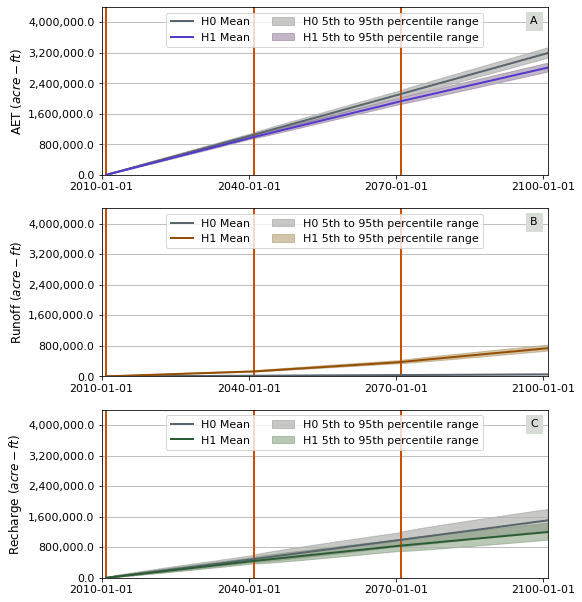

In [112]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, HR1_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, HR1_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, HR1_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, HR1_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax41.fill( DTTimeList, HR1_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax41.fill( DTTimeList, HR1_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax41.plot( TotCumInd, HR1_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, HR1_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax51.fill( DTTimeList, HR1_H0_RE_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax51.fill( DTTimeList, HR1_H1_RE_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax51.plot( TotCumInd, HR1_H0_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax51.plot( TotCumInd, HR1_H1_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:pine', label='H1 Mean' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (MnV, MxV) )
#ax51.set_yscale('log')
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge ($acre-ft$)', fontsize=12)
ax51.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### HRU 2

Adjust to be cumulative across 2011-2100

In [113]:
CP2 = HR2_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = HR2_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = HR2_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = HR2_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = HR2_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_RE[StatsHdsList[95]].to_numpy()
CP3 = HR2_H0_3_RE[StatsHdsList[95]].to_numpy()
CP4 = HR2_H0_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = HR2_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = HR2_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = HR2_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = HR2_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_RE[StatsHdsList[5]].to_numpy()
CP3 = HR2_H0_3_RE[StatsHdsList[5]].to_numpy()
CP4 = HR2_H0_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = HR2_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = HR2_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = HR2_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = HR2_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H0_2_RE[StatsHdsList[101]].to_numpy()
CP3 = HR2_H0_3_RE[StatsHdsList[101]].to_numpy()
CP4 = HR2_H0_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H0_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = HR2_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = HR2_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = HR2_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = HR2_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_RE[StatsHdsList[95]].to_numpy()
CP3 = HR2_H1_3_RE[StatsHdsList[95]].to_numpy()
CP4 = HR2_H1_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = HR2_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = HR2_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = HR2_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = HR2_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_RE[StatsHdsList[5]].to_numpy()
CP3 = HR2_H1_3_RE[StatsHdsList[5]].to_numpy()
CP4 = HR2_H1_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = HR2_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = HR2_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = HR2_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = HR2_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = HR2_H1_2_RE[StatsHdsList[101]].to_numpy()
CP3 = HR2_H1_3_RE[StatsHdsList[101]].to_numpy()
CP4 = HR2_H1_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
HR2_H1_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [114]:
FValList = list( HR2_H0_Cum_05_AET )
BackDTList = list( HR2_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
HR2_H0_AET_FilCI = deepcopy( FValList )
HR2_H0_AET_FilCI.extend( BackDTList )
FValList = list( HR2_H1_Cum_05_AET )
BackDTList = list( HR2_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
HR2_H1_AET_FilCI = deepcopy( FValList )
HR2_H1_AET_FilCI.extend( BackDTList )
FValList = list( HR2_H0_Cum_05_RO )
BackDTList = list( HR2_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
HR2_H0_RO_FilCI = deepcopy( FValList )
HR2_H0_RO_FilCI.extend( BackDTList )
FValList = list( HR2_H1_Cum_05_RO )
BackDTList = list( HR2_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
HR2_H1_RO_FilCI = deepcopy( FValList )
HR2_H1_RO_FilCI.extend( BackDTList )
FValList = list( HR2_H0_Cum_05_RE )
BackDTList = list( HR2_H0_Cum_95_RE )
BackDTList = BackDTList[::-1]
HR2_H0_RE_FilCI = deepcopy( FValList )
HR2_H0_RE_FilCI.extend( BackDTList )
FValList = list( HR2_H1_Cum_05_RE )
BackDTList = list( HR2_H1_Cum_95_RE )
BackDTList = BackDTList[::-1]
HR2_H1_RE_FilCI = deepcopy( FValList )
HR2_H1_RE_FilCI.extend( BackDTList )

Plot

In [115]:
MinVal = min( [ min( HR2_H1_RO_FilCI ), min( HR2_H0_RO_FilCI ), min( HR2_H1_RE_FilCI ), min( HR2_H0_RE_FilCI ), 
                min( HR2_H1_AET_FilCI ), min( HR2_H0_AET_FilCI ) ] )
MaxVal = max( [ max( HR2_H1_RO_FilCI ), max( HR2_H0_RO_FilCI ), max( HR2_H1_RE_FilCI ), max( HR2_H0_RE_FilCI ), 
                max( HR2_H1_AET_FilCI ), max( HR2_H0_AET_FilCI ) ] )
MinVal, MaxVal

(0.0, 1405991.3141287875)

In [116]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_HR2_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_HR2_DM3WB.svg'

In [117]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_HR2_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_HR2_DM3WB.png'

In [118]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_HR2_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_HR2_DM3WB.pdf'

In [119]:
fsTicks = [ 0.0, 800000.0, 1600000.0, 2400000.0, 3200000.0, 4000000.0 ]

In [120]:
MnV = 0.0
MxV = 4400000.0

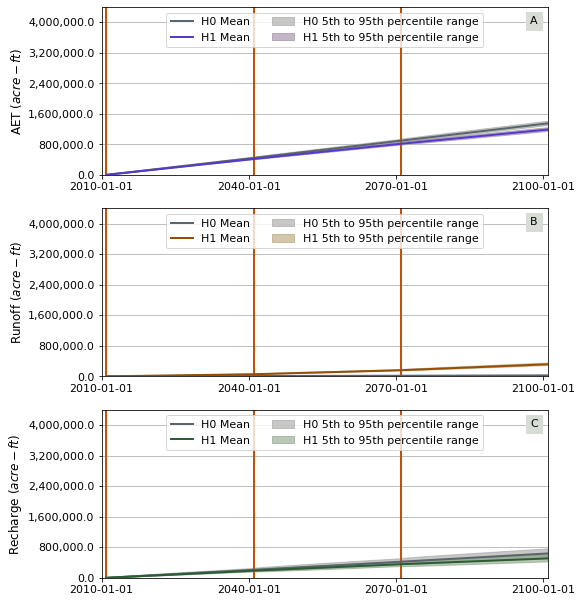

In [121]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, HR2_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, HR2_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, HR2_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, HR2_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax41.fill( DTTimeList, HR2_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax41.fill( DTTimeList, HR2_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax41.plot( TotCumInd, HR2_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, HR2_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax51.fill( DTTimeList, HR2_H0_RE_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax51.fill( DTTimeList, HR2_H1_RE_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax51.plot( TotCumInd, HR2_H0_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax51.plot( TotCumInd, HR2_H1_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:pine', label='H1 Mean' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (MnV, MxV) )
#ax51.set_yscale('log')
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge ($acre-ft$)', fontsize=12)
ax51.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 1

Adjust to be cumulative across 2011-2100

In [122]:
CP2 = RR1_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR1_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR1_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR1_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR1_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR1_H0_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR1_H0_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR1_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR1_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR1_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR1_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR1_H0_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR1_H0_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR1_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR1_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR1_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR1_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H0_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR1_H0_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR1_H0_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H0_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR1_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR1_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR1_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR1_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR1_H1_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR1_H1_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR1_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR1_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR1_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR1_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR1_H1_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR1_H1_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR1_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR1_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR1_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR1_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR1_H1_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR1_H1_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR1_H1_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR1_H1_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [123]:
FValList = list( RR1_H0_Cum_05_AET )
BackDTList = list( RR1_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR1_H0_AET_FilCI = deepcopy( FValList )
RR1_H0_AET_FilCI.extend( BackDTList )
FValList = list( RR1_H1_Cum_05_AET )
BackDTList = list( RR1_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR1_H1_AET_FilCI = deepcopy( FValList )
RR1_H1_AET_FilCI.extend( BackDTList )
FValList = list( RR1_H0_Cum_05_RO )
BackDTList = list( RR1_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR1_H0_RO_FilCI = deepcopy( FValList )
RR1_H0_RO_FilCI.extend( BackDTList )
FValList = list( RR1_H1_Cum_05_RO )
BackDTList = list( RR1_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR1_H1_RO_FilCI = deepcopy( FValList )
RR1_H1_RO_FilCI.extend( BackDTList )
FValList = list( RR1_H0_Cum_05_RE )
BackDTList = list( RR1_H0_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR1_H0_RE_FilCI = deepcopy( FValList )
RR1_H0_RE_FilCI.extend( BackDTList )
FValList = list( RR1_H1_Cum_05_RE )
BackDTList = list( RR1_H1_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR1_H1_RE_FilCI = deepcopy( FValList )
RR1_H1_RE_FilCI.extend( BackDTList )

Plot

In [173]:
MinVal = min( [ min( RR1_H1_RO_FilCI ), min( RR1_H0_RO_FilCI ), min( RR1_H1_RE_FilCI ), min( RR1_H0_RE_FilCI ), 
                min( RR1_H1_AET_FilCI ), min( RR1_H0_AET_FilCI ) ] )
MaxVal = max( [ max( RR1_H1_RO_FilCI ), max( RR1_H0_RO_FilCI ), max( RR1_H1_RE_FilCI ), max( RR1_H0_RE_FilCI ), 
                max( RR1_H1_AET_FilCI ), max( RR1_H0_AET_FilCI ) ] )
MinVal, MaxVal

(2.185916329792235, 896219.9062576294)

In [174]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR1_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR1_DM3WB.svg'

In [175]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR1_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR1_DM3WB.png'

In [176]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR1_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR1_DM3WB.pdf'

In [177]:
fsTicks = [ 0.0, 400000.0, 800000.0, 1200000.0, 1600000.0, 2000000.0 ]

In [178]:
MnV = 0.0
MxV = 2400000.0

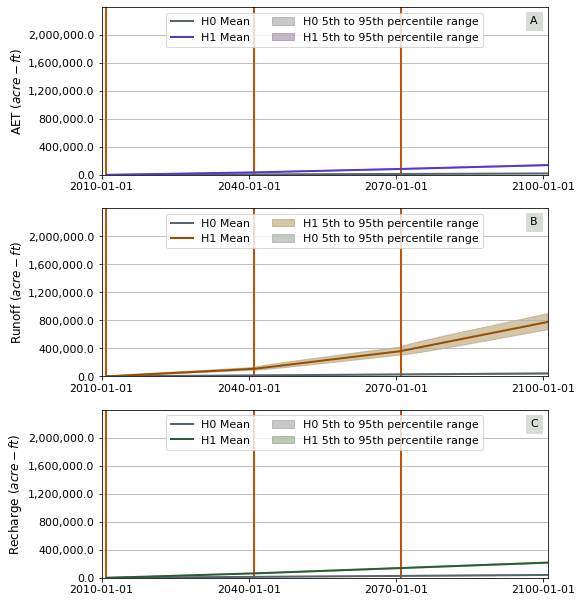

In [179]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, RR1_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, RR1_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, RR1_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, RR1_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF1 = ax41.fill( DTTimeList, RR1_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
sfF0 = ax41.fill( DTTimeList, RR1_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
ax41.plot( TotCumInd, RR1_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, RR1_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax51.fill( DTTimeList, RR1_H0_RE_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax51.fill( DTTimeList, RR1_H1_RE_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax51.plot( TotCumInd, RR1_H0_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax51.plot( TotCumInd, RR1_H1_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:pine', label='H1 Mean' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (MnV, MxV) )
#ax51.set_yscale('log')
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge ($acre-ft$)', fontsize=12)
ax51.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 2

Adjust to be cumulative across 2011-2100

In [131]:
CP2 = RR2_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR2_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR2_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR2_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR2_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR2_H0_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR2_H0_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR2_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR2_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR2_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR2_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR2_H0_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR2_H0_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR2_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR2_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR2_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR2_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H0_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR2_H0_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR2_H0_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H0_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR2_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR2_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR2_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR2_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR2_H1_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR2_H1_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR2_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR2_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR2_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR2_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR2_H1_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR2_H1_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR2_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR2_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR2_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR2_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR2_H1_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR2_H1_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR2_H1_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR2_H1_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [132]:
FValList = list( RR2_H0_Cum_05_AET )
BackDTList = list( RR2_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR2_H0_AET_FilCI = deepcopy( FValList )
RR2_H0_AET_FilCI.extend( BackDTList )
FValList = list( RR2_H1_Cum_05_AET )
BackDTList = list( RR2_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR2_H1_AET_FilCI = deepcopy( FValList )
RR2_H1_AET_FilCI.extend( BackDTList )
FValList = list( RR2_H0_Cum_05_RO )
BackDTList = list( RR2_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR2_H0_RO_FilCI = deepcopy( FValList )
RR2_H0_RO_FilCI.extend( BackDTList )
FValList = list( RR2_H1_Cum_05_RO )
BackDTList = list( RR2_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR2_H1_RO_FilCI = deepcopy( FValList )
RR2_H1_RO_FilCI.extend( BackDTList )
FValList = list( RR2_H0_Cum_05_RE )
BackDTList = list( RR2_H0_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR2_H0_RE_FilCI = deepcopy( FValList )
RR2_H0_RE_FilCI.extend( BackDTList )
FValList = list( RR2_H1_Cum_05_RE )
BackDTList = list( RR2_H1_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR2_H1_RE_FilCI = deepcopy( FValList )
RR2_H1_RE_FilCI.extend( BackDTList )

Plot

In [133]:
MinVal = min( [ min( RR2_H1_RO_FilCI ), min( RR2_H0_RO_FilCI ), min( RR2_H1_RE_FilCI ), min( RR2_H0_RE_FilCI ), 
                min( RR2_H1_AET_FilCI ), min( RR2_H0_AET_FilCI ) ] )
MaxVal = max( [ max( RR2_H1_RO_FilCI ), max( RR2_H0_RO_FilCI ), max( RR2_H1_RE_FilCI ), max( RR2_H0_RE_FilCI ), 
                max( RR2_H1_AET_FilCI ), max( RR2_H0_AET_FilCI ) ] )
MinVal, MaxVal

(2.602607328386512, 1038640.174621582)

In [134]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR2_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR2_DM3WB.svg'

In [135]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR2_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR2_DM3WB.png'

In [136]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR2_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR2_DM3WB.pdf'

In [137]:
fsTicks = [ 0.0, 400000.0, 800000.0, 1200000.0, 1600000.0, 2000000.0 ]

In [138]:
MnV = 0.0
MxV = 2400000.0

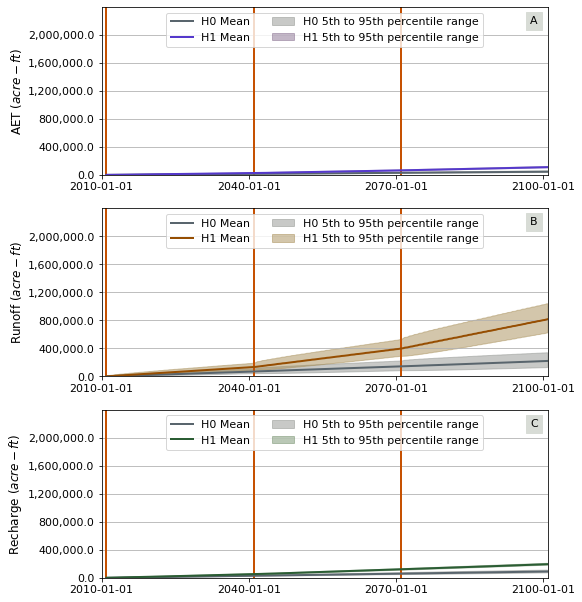

In [139]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, RR2_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, RR2_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, RR2_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, RR2_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax41.fill( DTTimeList, RR2_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax41.fill( DTTimeList, RR2_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax41.plot( TotCumInd, RR2_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, RR2_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax51.fill( DTTimeList, RR2_H0_RE_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax51.fill( DTTimeList, RR2_H1_RE_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax51.plot( TotCumInd, RR2_H0_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax51.plot( TotCumInd, RR2_H1_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:pine', label='H1 Mean' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (MnV, MxV) )
#ax51.set_yscale('log')
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge ($acre-ft$)', fontsize=12)
ax51.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 3

Adjust to be cumulative across 2011-2100

In [140]:
CP2 = RR3_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR3_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR3_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR3_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR3_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR3_H0_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR3_H0_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR3_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR3_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR3_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR3_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR3_H0_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR3_H0_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR3_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR3_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR3_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR3_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H0_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR3_H0_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR3_H0_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H0_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR3_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR3_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR3_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR3_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR3_H1_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR3_H1_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR3_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR3_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR3_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR3_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR3_H1_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR3_H1_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR3_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR3_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR3_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR3_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR3_H1_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR3_H1_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR3_H1_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR3_H1_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [141]:
FValList = list( RR3_H0_Cum_05_AET )
BackDTList = list( RR3_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR3_H0_AET_FilCI = deepcopy( FValList )
RR3_H0_AET_FilCI.extend( BackDTList )
FValList = list( RR3_H1_Cum_05_AET )
BackDTList = list( RR3_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR3_H1_AET_FilCI = deepcopy( FValList )
RR3_H1_AET_FilCI.extend( BackDTList )
FValList = list( RR3_H0_Cum_05_RO )
BackDTList = list( RR3_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR3_H0_RO_FilCI = deepcopy( FValList )
RR3_H0_RO_FilCI.extend( BackDTList )
FValList = list( RR3_H1_Cum_05_RO )
BackDTList = list( RR3_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR3_H1_RO_FilCI = deepcopy( FValList )
RR3_H1_RO_FilCI.extend( BackDTList )
FValList = list( RR3_H0_Cum_05_RE )
BackDTList = list( RR3_H0_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR3_H0_RE_FilCI = deepcopy( FValList )
RR3_H0_RE_FilCI.extend( BackDTList )
FValList = list( RR3_H1_Cum_05_RE )
BackDTList = list( RR3_H1_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR3_H1_RE_FilCI = deepcopy( FValList )
RR3_H1_RE_FilCI.extend( BackDTList )

Plot

In [142]:
MinVal = min( [ min( RR3_H1_RO_FilCI ), min( RR3_H0_RO_FilCI ), min( RR3_H1_RE_FilCI ), min( RR3_H0_RE_FilCI ), 
                min( RR3_H1_AET_FilCI ), min( RR3_H0_AET_FilCI ) ] )
MaxVal = max( [ max( RR3_H1_RO_FilCI ), max( RR3_H0_RO_FilCI ), max( RR3_H1_RE_FilCI ), max( RR3_H0_RE_FilCI ), 
                max( RR3_H1_AET_FilCI ), max( RR3_H0_AET_FilCI ) ] )
MinVal, MaxVal

(0.7876269233638595, 1123708.5966949463)

In [143]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR3_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR3_DM3WB.svg'

In [144]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR3_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR3_DM3WB.png'

In [145]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR3_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR3_DM3WB.pdf'

In [146]:
fsTicks = [ 0.0, 400000.0, 800000.0, 1200000.0, 1600000.0, 2000000.0 ]

In [147]:
MnV = 0.0
MxV = 2400000.0

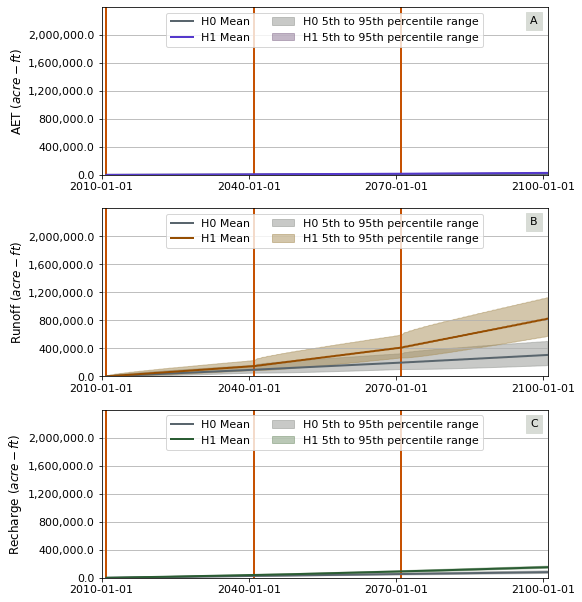

In [148]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, RR3_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, RR3_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, RR3_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, RR3_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax41.fill( DTTimeList, RR3_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax41.fill( DTTimeList, RR3_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax41.plot( TotCumInd, RR3_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, RR3_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax51.fill( DTTimeList, RR3_H0_RE_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax51.fill( DTTimeList, RR3_H1_RE_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax51.plot( TotCumInd, RR3_H0_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax51.plot( TotCumInd, RR3_H1_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:pine', label='H1 Mean' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (MnV, MxV) )
#ax51.set_yscale('log')
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge ($acre-ft$)', fontsize=12)
ax51.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 4

Adjust to be cumulative across 2011-2100

In [149]:
CP2 = RR4_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR4_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR4_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR4_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR4_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR4_H0_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR4_H0_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR4_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR4_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR4_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR4_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR4_H0_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR4_H0_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR4_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR4_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR4_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR4_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H0_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR4_H0_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR4_H0_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H0_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR4_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR4_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR4_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR4_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_RE[StatsHdsList[95]].to_numpy()
CP3 = RR4_H1_3_RE[StatsHdsList[95]].to_numpy()
CP4 = RR4_H1_4_RE[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_95_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR4_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR4_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR4_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR4_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_RE[StatsHdsList[5]].to_numpy()
CP3 = RR4_H1_3_RE[StatsHdsList[5]].to_numpy()
CP4 = RR4_H1_4_RE[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_05_RE = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR4_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR4_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR4_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR4_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR4_H1_2_RE[StatsHdsList[101]].to_numpy()
CP3 = RR4_H1_3_RE[StatsHdsList[101]].to_numpy()
CP4 = RR4_H1_4_RE[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR4_H1_Cum_ME_RE = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [150]:
FValList = list( RR4_H0_Cum_05_AET )
BackDTList = list( RR4_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR4_H0_AET_FilCI = deepcopy( FValList )
RR4_H0_AET_FilCI.extend( BackDTList )
FValList = list( RR4_H1_Cum_05_AET )
BackDTList = list( RR4_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR4_H1_AET_FilCI = deepcopy( FValList )
RR4_H1_AET_FilCI.extend( BackDTList )
FValList = list( RR4_H0_Cum_05_RO )
BackDTList = list( RR4_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR4_H0_RO_FilCI = deepcopy( FValList )
RR4_H0_RO_FilCI.extend( BackDTList )
FValList = list( RR4_H1_Cum_05_RO )
BackDTList = list( RR4_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR4_H1_RO_FilCI = deepcopy( FValList )
RR4_H1_RO_FilCI.extend( BackDTList )
FValList = list( RR4_H0_Cum_05_RE )
BackDTList = list( RR4_H0_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR4_H0_RE_FilCI = deepcopy( FValList )
RR4_H0_RE_FilCI.extend( BackDTList )
FValList = list( RR4_H1_Cum_05_RE )
BackDTList = list( RR4_H1_Cum_95_RE )
BackDTList = BackDTList[::-1]
RR4_H1_RE_FilCI = deepcopy( FValList )
RR4_H1_RE_FilCI.extend( BackDTList )

Plot

In [151]:
MinVal = min( [ min( RR4_H1_RO_FilCI ), min( RR4_H0_RO_FilCI ), min( RR4_H1_RE_FilCI ), min( RR4_H0_RE_FilCI ), 
                min( RR4_H1_AET_FilCI ), min( RR4_H0_AET_FilCI ) ] )
MaxVal = max( [ max( RR4_H1_RO_FilCI ), max( RR4_H0_RO_FilCI ), max( RR4_H1_RE_FilCI ), max( RR4_H0_RE_FilCI ), 
                max( RR4_H1_AET_FilCI ), max( RR4_H0_AET_FilCI ) ] )
MinVal, MaxVal

(0.8475462631686241, 1136223.1059417725)

In [152]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR4_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR4_DM3WB.svg'

In [153]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR4_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR4_DM3WB.png'

In [154]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR4_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR4_DM3WB.pdf'

In [155]:
fsTicks = [ 0.0, 400000.0, 800000.0, 1200000.0, 1600000.0, 2000000.0 ]

In [156]:
MnV = 0.0
MxV = 2400000.0

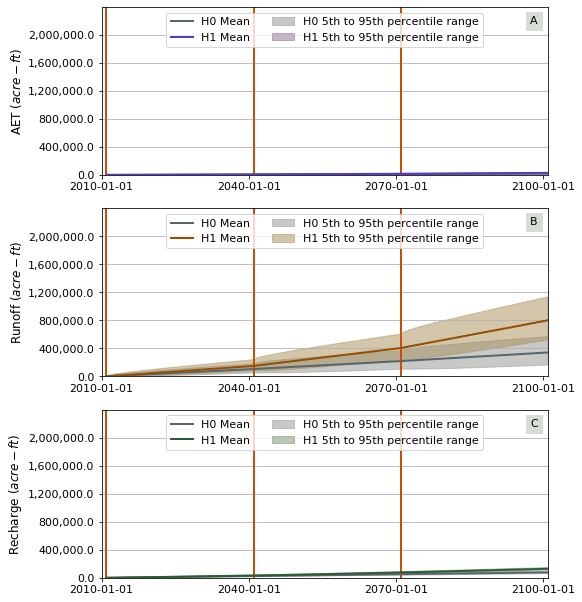

In [157]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, RR4_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, RR4_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, RR4_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, RR4_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax41.fill( DTTimeList, RR4_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax41.fill( DTTimeList, RR4_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax41.plot( TotCumInd, RR4_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, RR4_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax51.fill( DTTimeList, RR4_H0_RE_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax51.fill( DTTimeList, RR4_H1_RE_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax51.plot( TotCumInd, RR4_H0_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax51.plot( TotCumInd, RR4_H1_Cum_ME_RE, linestyle='-',
           linewidth=2, color='xkcd:pine', label='H1 Mean' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (MnV, MxV) )
#ax51.set_yscale('log')
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge ($acre-ft$)', fontsize=12)
ax51.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 5

Adjust to be cumulative across 2011-2100

In [158]:
CP2 = RR5_H0_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR5_H0_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR5_H0_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H0_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H0_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR5_H0_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR5_H0_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H0_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H0_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR5_H0_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR5_H0_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H0_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H0_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR5_H0_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR5_H0_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H0_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H0_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR5_H0_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR5_H0_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H0_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H0_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR5_H0_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR5_H0_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H0_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H1_2_AET[StatsHdsList[95]].to_numpy()
CP3 = RR5_H1_3_AET[StatsHdsList[95]].to_numpy()
CP4 = RR5_H1_4_AET[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H1_Cum_95_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H1_2_RO[StatsHdsList[95]].to_numpy()
CP3 = RR5_H1_3_RO[StatsHdsList[95]].to_numpy()
CP4 = RR5_H1_4_RO[StatsHdsList[95]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H1_Cum_95_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H1_2_AET[StatsHdsList[5]].to_numpy()
CP3 = RR5_H1_3_AET[StatsHdsList[5]].to_numpy()
CP4 = RR5_H1_4_AET[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H1_Cum_05_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H1_2_RO[StatsHdsList[5]].to_numpy()
CP3 = RR5_H1_3_RO[StatsHdsList[5]].to_numpy()
CP4 = RR5_H1_4_RO[StatsHdsList[5]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H1_Cum_05_RO = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H1_2_AET[StatsHdsList[101]].to_numpy()
CP3 = RR5_H1_3_AET[StatsHdsList[101]].to_numpy()
CP4 = RR5_H1_4_AET[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H1_Cum_ME_AET = np.concatenate( [CP2, CP3, CP4] )
CP2 = RR5_H1_2_RO[StatsHdsList[101]].to_numpy()
CP3 = RR5_H1_3_RO[StatsHdsList[101]].to_numpy()
CP4 = RR5_H1_4_RO[StatsHdsList[101]].to_numpy()
CP3 = CP3 + CP2[P2Len-1]
CP4 = CP4 + CP3[P3Len-1]
RR5_H1_Cum_ME_RO = np.concatenate( [CP2, CP3, CP4] )

Make our filled interval

In [159]:
FValList = list( RR5_H0_Cum_05_AET )
BackDTList = list( RR5_H0_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR5_H0_AET_FilCI = deepcopy( FValList )
RR5_H0_AET_FilCI.extend( BackDTList )
FValList = list( RR5_H1_Cum_05_AET )
BackDTList = list( RR5_H1_Cum_95_AET )
BackDTList = BackDTList[::-1]
RR5_H1_AET_FilCI = deepcopy( FValList )
RR5_H1_AET_FilCI.extend( BackDTList )
FValList = list( RR5_H0_Cum_05_RO )
BackDTList = list( RR5_H0_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR5_H0_RO_FilCI = deepcopy( FValList )
RR5_H0_RO_FilCI.extend( BackDTList )
FValList = list( RR5_H1_Cum_05_RO )
BackDTList = list( RR5_H1_Cum_95_RO )
BackDTList = BackDTList[::-1]
RR5_H1_RO_FilCI = deepcopy( FValList )
RR5_H1_RO_FilCI.extend( BackDTList )

Plot

In [160]:
MinVal = min( [ min( RR5_H1_RO_FilCI ), min( RR5_H0_RO_FilCI ), 
                min( RR5_H1_AET_FilCI ), min( RR5_H0_AET_FilCI ) ] )
MaxVal = max( [ max( RR5_H1_RO_FilCI ), max( RR5_H0_RO_FilCI ),
                max( RR5_H1_AET_FilCI ), max( RR5_H0_AET_FilCI ) ] )
MinVal, MaxVal

(5.223750094795832, 1971228.7715759277)

In [161]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR5_DM3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR5_DM3WB.svg'

In [162]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR5_DM3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR5_DM3WB.png'

In [163]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RR5_DM3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RR5_DM3WB.pdf'

In [164]:
fsTicks = [ 0.0, 400000.0, 800000.0, 1200000.0, 1600000.0, 2000000.0 ]

In [165]:
MnV = 0.0
MxV = 2400000.0

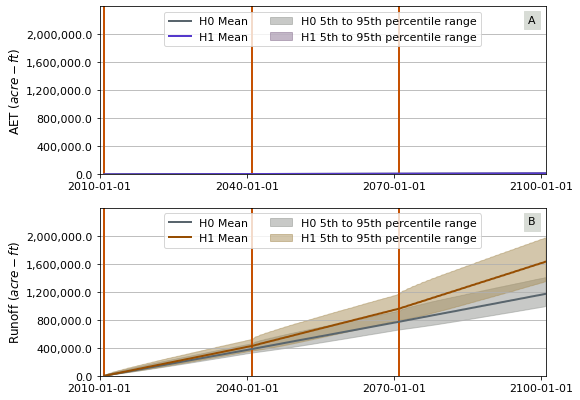

In [166]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax31.fill( DTTimeList, RR5_H0_AET_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax31.fill( DTTimeList, RR5_H1_AET_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                  label="H1 5th to 95th percentile range" )
ax31.plot( TotCumInd, RR5_H0_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax31.plot( TotCumInd, RR5_H1_Cum_ME_AET, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='H1 Mean' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (MnV, MxV) )
#ax31.set_yscale('log')
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET ($acre-ft$)', fontsize=12)
ax31.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF0 = ax41.fill( DTTimeList, RR5_H0_RO_FilCI, color='xkcd:grey', alpha=0.50, 
                  label="H0 5th to 95th percentile range" )
sfF1 = ax41.fill( DTTimeList, RR5_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="H1 5th to 95th percentile range")
ax41.plot( TotCumInd, RR5_H0_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:slate grey', label='H0 Mean' )
ax41.plot( TotCumInd, RR5_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='H1 Mean' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax41.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.90), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
#ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
#              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
#ax51 = Fig1.add_subplot(3,1,3)
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

## Special Plots

Plot runoff from HRU #1 and HRU #2 along with runoff from Reach #1 and Reach #5

In [167]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RO_RR1HR12.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RO_RR1HR12.svg'

In [168]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RO_RR1HR12.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RO_RR1HR12.png'

In [169]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "CumBas_RO_RR1HR12.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\CumBas_RO_RR1HR12.pdf'

In [170]:
fsTicks = [ 0.0, 400000.0, 800000.0, 1200000.0, 1600000.0, 2000000.0 ]

In [171]:
MnV = 0.0
MxV = 2400000.0

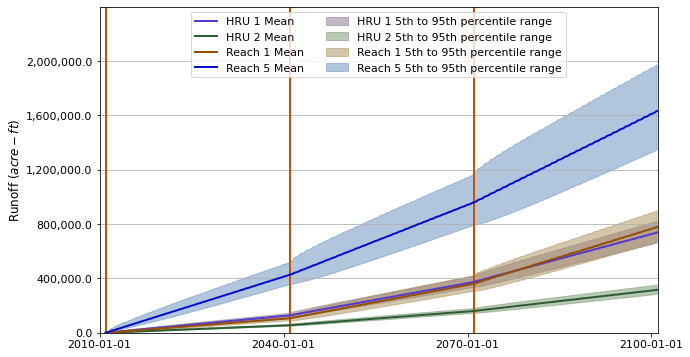

In [172]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MnV, MxV], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
hr1F = ax11.fill( DTTimeList, HR1_H1_RO_FilCI, color='xkcd:greyish purple', alpha=0.50, 
                 label="HRU 1 5th to 95th percentile range")
ax11.plot( TotCumInd, HR1_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:blurple', label='HRU 1 Mean' )
hr2F = ax11.fill( DTTimeList, HR2_H1_RO_FilCI, color='xkcd:green grey', alpha=0.50, 
                 label="HRU 2 5th to 95th percentile range")
ax11.plot( TotCumInd, HR2_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:pine', label='HRU 2 Mean' )
rr1F = ax11.fill( DTTimeList, RR1_H1_RO_FilCI, color='xkcd:dark sand', alpha=0.50, 
                 label="Reach 1 5th to 95th percentile range")
ax11.plot( TotCumInd, RR1_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:warm brown', label='Reach 1 Mean' )
rr5F = ax11.fill( DTTimeList, RR5_H1_RO_FilCI, color='xkcd:faded blue', alpha=0.50, 
                 label="Reach 5 5th to 95th percentile range")
ax11.plot( TotCumInd, RR5_H1_Cum_ME_RO, linestyle='-',
           linewidth=2, color='xkcd:true blue', label='Reach 5 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_xticks( xTicks )
ax11.set_yticks( fsTicks )
ax11.set_ylim( (MnV, MxV) )
#ax41.set_yscale('log')
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Runoff ($acre-ft$)', fontsize=12)
ax11.legend( loc='upper center', fontsize=11.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11)
ax11.tick_params(axis='x', which='major', labelrotation=0.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )